In [27]:
import glob
import os
import sys
import functions
import csv
from pathlib import Path

folder = r".\IC_1"   # <-- change this
pattern = os.path.join(folder, "fcolor_*.csv")

files = glob.glob(pattern)
print(len(files))

sustain_result = {}
with open("sustain_results.csv") as csv_file:
    reader = csv.reader(csv_file)
    for row in reader:
        sustain_result[row[0]] = float(row[1])



139


In [37]:
len([_ for _ in sustain_result.values() if float(_)>=2000])

24

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize

# ----------------------------------------------------
# 1. Downsample function (smooth + anti-aliasing)
# ----------------------------------------------------
def resize_down(img, scale=0.125):   # 512 → 64
    H = int(img.shape[0] * scale)
    W = int(img.shape[1] * scale)
    return resize(img, (H, W), anti_aliasing=True)


# ----------------------------------------------------
# 2. Load & downsample all images
# ----------------------------------------------------
arrays_small = []
arrays_small_sustain = []
for idx,f in enumerate(files):
    arr = functions.load_voltage(f, plot=False)   # original 512×512×4
    img = arr[:, :, 0]                           # use channel 0
    small = resize_down(img)                     # → 64×64 smooth downsample
    arrays_small.append(small)
    f_posix = Path(f).as_posix()
    if sustain_result[f_posix] > 1000:
        arrays_small_sustain.append(small)
    print(idx) if idx % 20 == 0 else None


0
20
40
60
80
100
120


KeyError: 'IC_1/fcolor_99.csv'

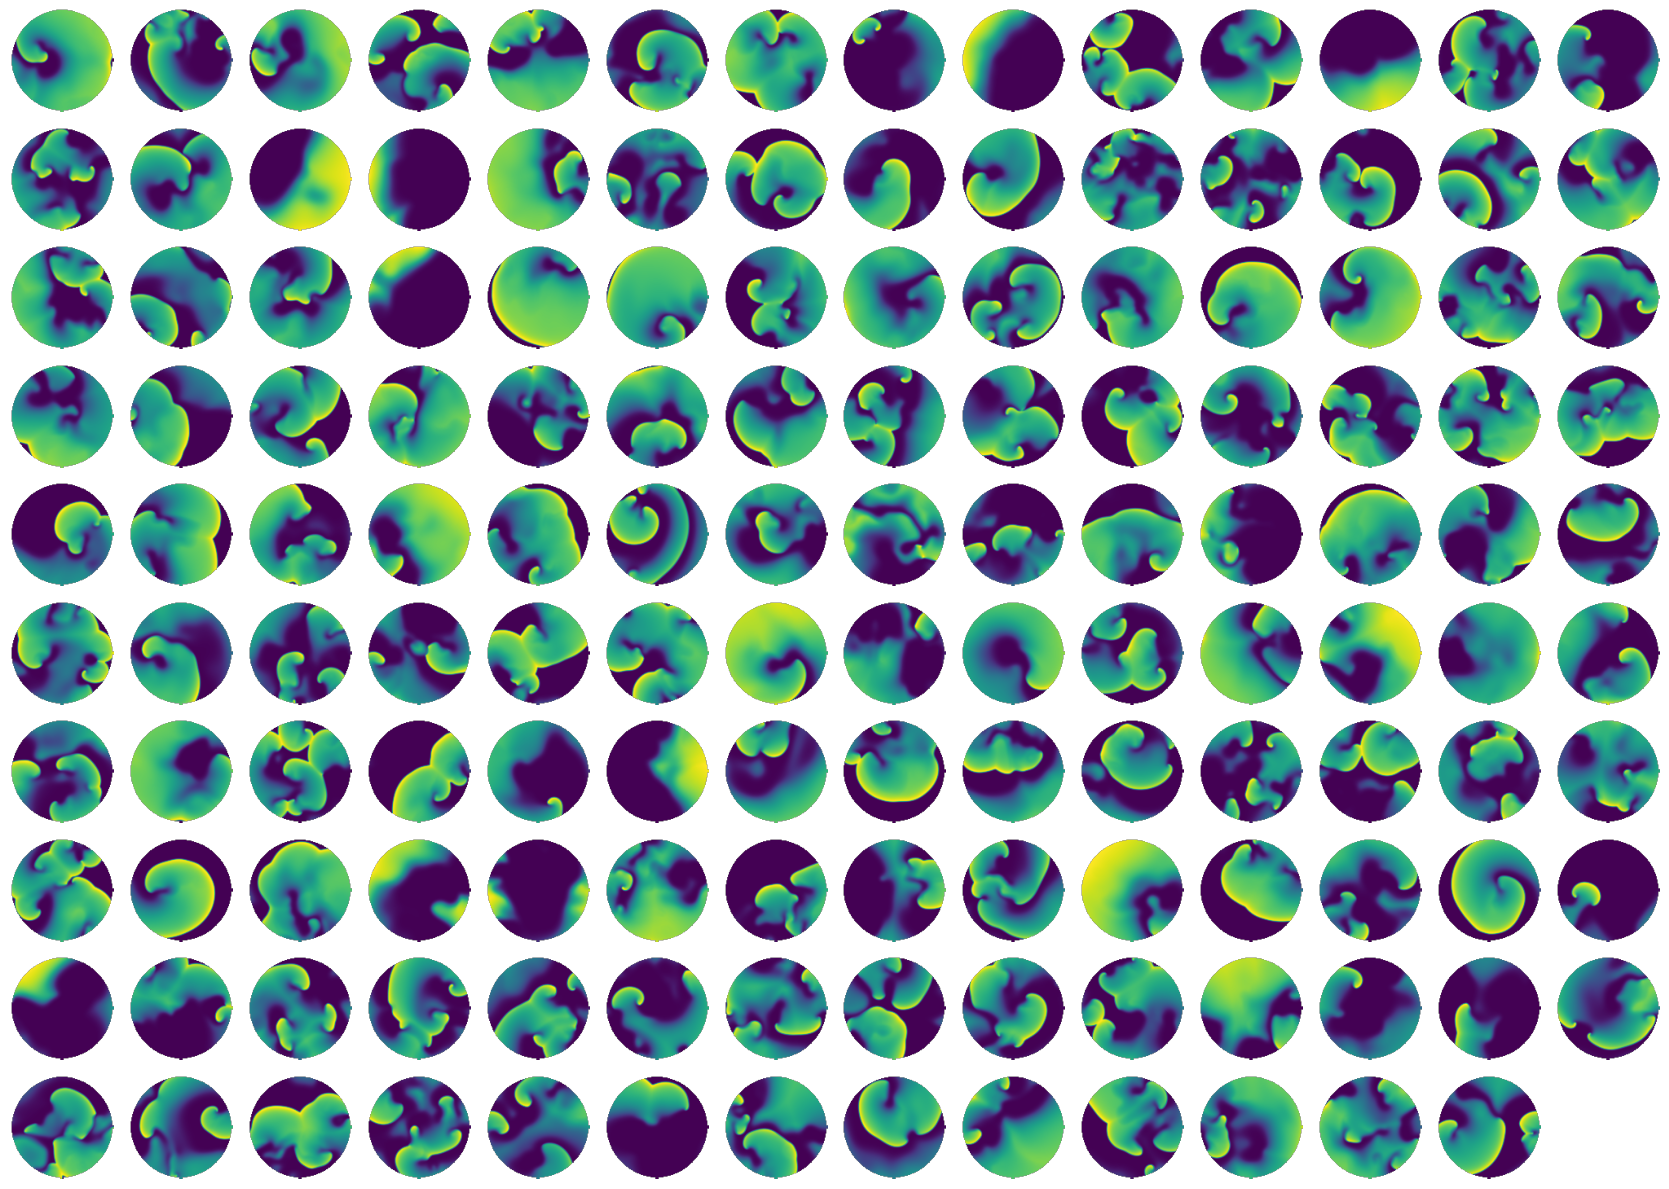

In [29]:
# ----------------------------------------------------
# 3. Plot in a big 10×14 grid (1 empty)
# ----------------------------------------------------
ROWS, COLS = 10, 14
fig, axes = plt.subplots(ROWS, COLS, figsize=(COLS*1.2, ROWS*1.2))

idx = 0
for r in range(ROWS):
    for c in range(COLS):
        ax = axes[r][c]
        ax.axis("off")

        if idx < len(arrays_small):      # 139 images → 1 empty slot
            ax.imshow(arrays_small[idx], cmap='viridis')
        else:
            ax.set_facecolor("black")    # last slot blank

        idx += 1

plt.tight_layout()
plt.savefig(os.path.join(folder, "all_IC.png"), dpi=150)
plt.show()


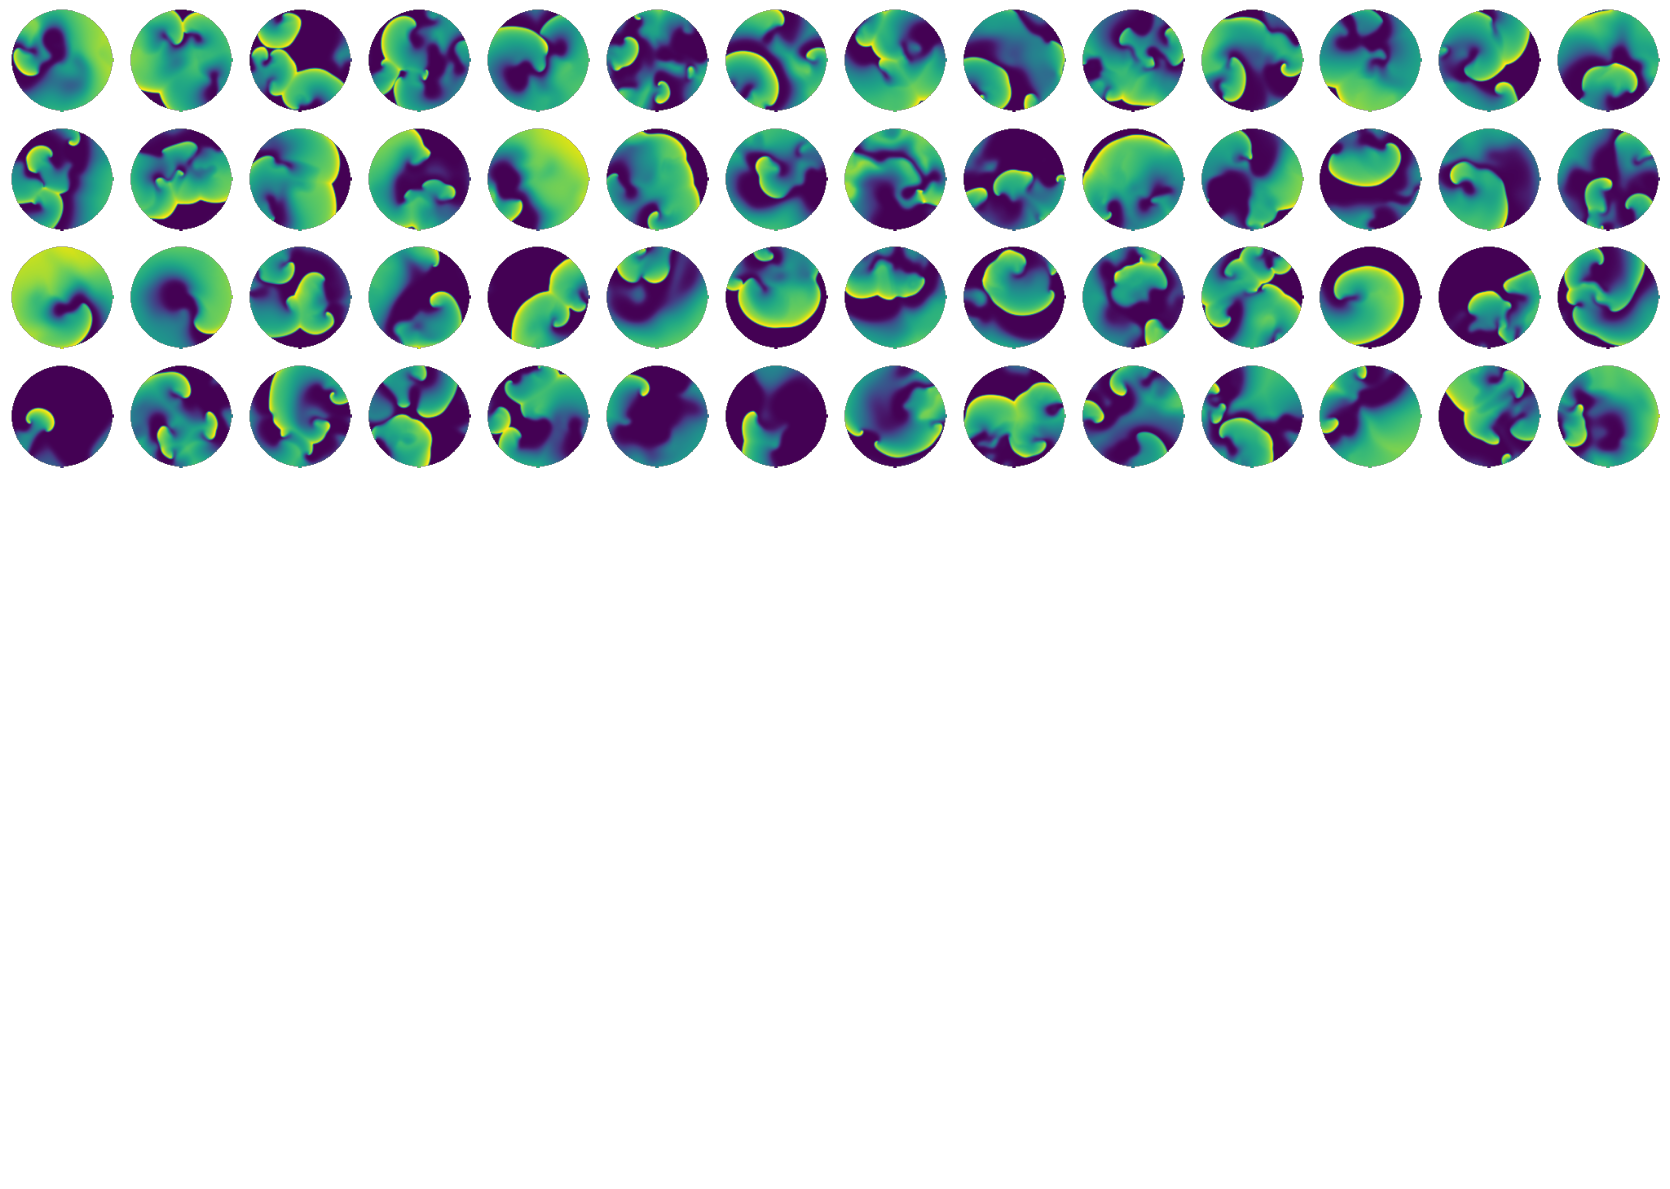

In [33]:
ROWS, COLS = 10, 14
fig, axes = plt.subplots(ROWS, COLS, figsize=(COLS*1.2, ROWS*1.2))

idx = 0
for r in range(ROWS):
    for c in range(COLS):
        ax = axes[r][c]
        ax.axis("off")

        if idx < len(arrays_small_sustain):      # 139 images → 1 empty slot
            ax.imshow(arrays_small_sustain[idx], cmap='viridis')
        else:
            ax.set_facecolor("black")    # last slot blank

        idx += 1

plt.tight_layout()
plt.savefig(os.path.join(folder, "all_IC_sustain_1000.png"), dpi=150)
plt.show()
